# Examples for running FLORIS_loads_DR

In [11]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [12]:
floris = Floris("Input_NREL5MW_SWF_3WT_8mps.json")
#floris = Floris("example_input.json")

## Calculate Wake

In [13]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.016971826553344727 s


## Compute Velocities at each Turbine

In [14]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -", turbine.pow_scale)
    print("\tyaw_angle - ", turbine.yaw_angle)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.48390057]
	Ct - [0.76293975]
	power - [1685420.18637547]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.25655583]
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.47908381]
	Ct - [0.73097301]
	power - [935361.30463895]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.24066094]
	average velocity - 6.47308024284217
(1612.0, 0.0):
	Cp - [0.47624763]
	Ct - [0.72254242]
	power - [842216.02423978]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.23662879]
	average velocity - 6.263040872579965


## Visualization Manager for FLORIS 

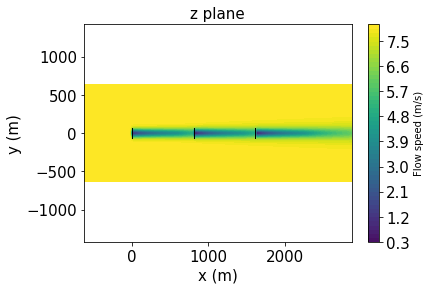

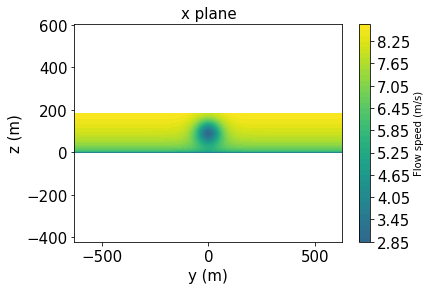

In [15]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Power Scale and Yaw Angle Adjusting

In [39]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].pow_scale = 0.9
turbines[0].yaw_angle = 10 * np.pi / 180 # degree to rad
floris.farm.flow_field.calculate_wake()

In [40]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -",turbine.pow_scale)
    print("\tai -", turbine.aI)
    print("\tyaw_angle -", turbine.yaw_angle * 180 / np.pi) # rad to degree
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.43551052]
	Ct - [0.59985468]
	power - [1473843.75094074]
	pow_scale - 0.9
	ai - [0.18291229]
	yaw_angle - 10.0
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.28900367]
	Ct - [0.35914206]
	power - [551134.3599376]
	pow_scale - 0.4363323129985824
	ai - [0.09859587]
	yaw_angle - 25.0
	average velocity - 6.830937101876448
(1612.0, 0.0):
	Cp - [0.48287771]
	Ct - [0.75360067]
	power - [1207061.57236485]
	pow_scale - 1.0
	ai - [0.25180686]
	yaw_angle - 0.0
	average velocity - 7.028874305655302


## Sweep Power Scale and Yaw Angle of turbine_0 

In [41]:
pow_scale_0 = np.arange(0.75,1.01,0.01)
yaw_angle_0 = np.arange(0,26,1)

pow2_0 = np.zeros([26,26])
pow2_1 = np.zeros([26,26])
pow2_2 = np.zeros([26,26])

for p_idx_0, p0 in enumerate(pow_scale_0):
    turbines[0].pow_scale = p0
    for y_idx_0, y0 in enumerate(yaw_angle_0):
        turbines[0].yaw_angle = y0 * np.pi / 180  # degree to rad
        floris.farm.flow_field.calculate_wake()
        pow2_0[p_idx_0, y_idx_0] = turbines[0].power
        pow2_1[p_idx_0, y_idx_0] = turbines[1].power
        pow2_2[p_idx_0, y_idx_0] = turbines[2].power

pow2_t = pow2_0 + pow2_1 + pow2_2

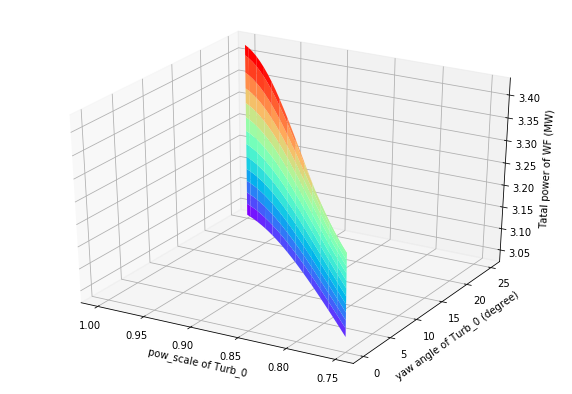

In [42]:
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.cm as cm

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.invert_xaxis()
#ax.invert_yaxis()
ax.plot_surface(pow_scale_0, yaw_angle_0, pow2_t/1e6, \
                rstride=2, cstride=2, cmap=cm.rainbow,linewidth=0.5, antialiased=True)
ax.set_xlabel('pow_scale of Turb_0')
ax.set_ylabel('yaw angle of Turb_0 (degree)')
ax.set_zlabel('Tatal power of WF (MW)')
plt.show()

In [61]:
pow2_t_max = np.max(pow2_t)
pow2_t_max_idx = np.where(pow2_t == np.max(pow2_t))
pow_scale_0_max = 0.75 + pow2_t_max_idx[0][0]*0.01
yaw_angle_0_max = 0 + pow2_t_max_idx[1][0]*1

print('The orginal power of WF is',round(pow2_t[25][0]/1e6,2),'MW ( pow_scale = 1.0, yaw_angle = 0 )')
print('The maximum power of WF is',round(pow2_t_max/1e6,2),'MW ( pow_scale =', round(pow_scale_0_max,2),\
      ', yaw_angle =', round(yaw_angle_0_max,2),')')
print('The power of WF with largest yaw misalignment is', round(pow2_t[25,25]/1e6,2),'MW ( pow_scale =1.0, yaw_angle = 25 )')
print('The power increase of WF is',round((pow2_t_max - pow2_t[25][0])/1e6,2),'MW')
print('The relative increase power is',round((pow2_t_max-pow2_t[25][0])/pow2_t[25][0],2),'%')
print('The corresponding power scale of Turb_0:',round(pow_scale_0_max,2))
print('The corresponding yaw angle of Turb_0:',round(yaw_angle_0_max,2))

The orginal power of WF is 3.24 MW ( pow_scale = 1.0, yaw_angle = 0 )
The maximum power of WF is 3.43 MW ( pow_scale = 1.0 , yaw_angle = 23 )
The power of WF with largest yaw misalignment is 3.42 MW ( pow_scale =1.0, yaw_angle = 25 )
The power increase of WF is 0.19 MW
The relative increase power is 0.06 %
The corresponding power scale of Turb_0: 1.0
The corresponding yaw angle of Turb_0: 23


In [44]:
print(pow2_t[25,0],pow2_t[25,25])

3236014.773603183 3423936.105376454


Text(0.5, 0, 'yaw angle of Turb_0 (degree)')

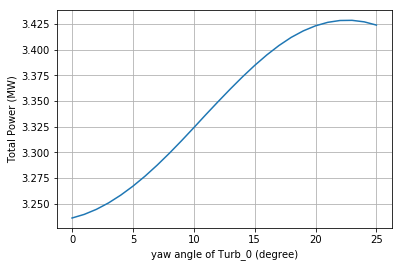

In [66]:
plt.plot(yaw_angle_0,pow2_t[25,:]/1e6)
plt.grid()
plt.ylabel('Total Power (MW)')
plt.xlabel('yaw angle of Turb_0 (degree)')

Text(0.5, 0, 'power scale of Turb_0 (degree)')

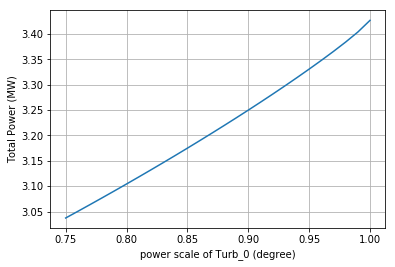

In [67]:
plt.plot(pow_scale_0,pow2_t[:,24]/1e6)
plt.grid()
plt.ylabel('Total Power (MW)')
plt.xlabel('power scale of Turb_0 (degree)')